In [7]:
from src.dataset import get_mnist_loaders, get_cifar10_loaders
from src.model import SimpleCNN
from src.resnet import ResNetClassifier
from src.trainf import train
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torchinfo import summary


torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cuda


In [2]:
mnist_sample, _ = get_mnist_loaders(batch_size=16)
cifar_sample, _ = get_cifar10_loaders(batch_size=16, augment=False)

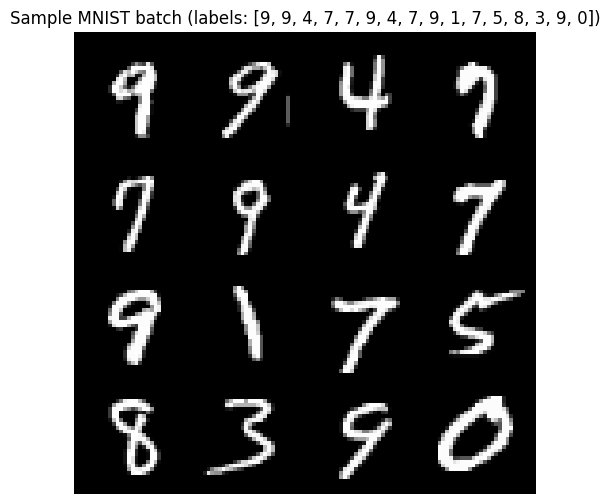

In [3]:
# Plotting a sample of MNIST
mnist_images, mnist_labels = next(iter(mnist_sample))

grid_mnist = torchvision.utils.make_grid(mnist_images, nrow=4, normalize=True, padding=2)

plt.figure(figsize=(6,6))
plt.imshow(grid_mnist.permute(1, 2, 0), cmap='gray')
plt.title('Sample MNIST batch (labels: {})'.format(mnist_labels.tolist()))
plt.axis('off')
plt.show()

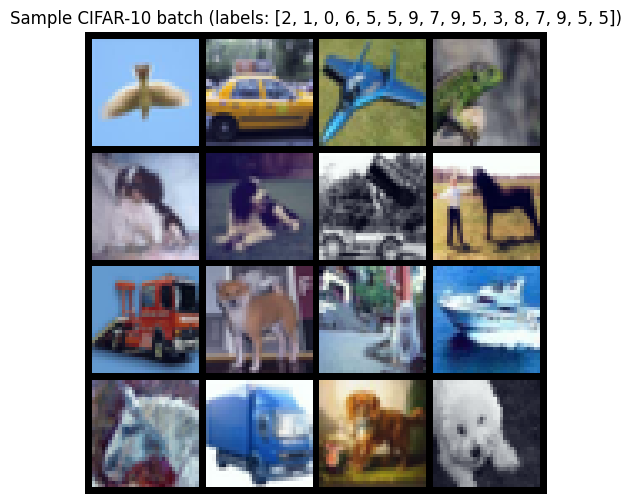

In [4]:
# Plotting a sample of CIFAR-10
cifar_images, cifar_labels = next(iter(cifar_sample))

grid_cifar = torchvision.utils.make_grid(cifar_images, nrow=4, normalize=True, padding=2)

plt.figure(figsize=(6,6))

plt.imshow(grid_cifar.permute(1, 2, 0), cmap='gray')
plt.title('Sample CIFAR-10 batch (labels: {})'.format(cifar_labels.tolist()))
plt.axis('off')
plt.show()

In [5]:
# SimpleCNN model summary
model_CNN = SimpleCNN().to(device)

summary(model_CNN, input_size=(1,1,28,28), col_names=["input_size","output_size", "num_params"],
        col_width = 16, row_settings=["var_names"])

Layer (type (var_name))                  Input Shape      Output Shape     Param #
SimpleCNN (SimpleCNN)                    [1, 1, 28, 28]   [1, 10]          --
├─Conv2d (conv1)                         [1, 1, 28, 28]   [1, 16, 28, 28]  160
├─Conv2d (conv2)                         [1, 16, 14, 14]  [1, 32, 14, 14]  4,640
├─Conv2d (conv3)                         [1, 32, 7, 7]    [1, 64, 7, 7]    18,496
├─Linear (fc1)                           [1, 576]         [1, 128]         73,856
├─Linear (fc2)                           [1, 128]         [1, 10]          1,290
Total params: 98,442
Trainable params: 98,442
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.02
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.39
Estimated Total Size (MB): 0.57

In [6]:
# Resnet model summary
model_res = ResNetClassifier(in_channels=3, num_classes=10).to(device)

summary(model_res, input_size=(4,3,32,32), col_names=["input_size","output_size", "num_params"],
        col_width = 16, row_settings=["var_names"])

Layer (type (var_name))                       Input Shape      Output Shape     Param #
ResNetClassifier (ResNetClassifier)           [4, 3, 32, 32]   [4, 10]          --
├─ResNet (backbone)                           [4, 3, 32, 32]   [4, 10]          --
│    └─Conv2d (conv1)                         [4, 3, 32, 32]   [4, 64, 16, 16]  9,408
│    └─BatchNorm2d (bn1)                      [4, 64, 16, 16]  [4, 64, 16, 16]  128
│    └─ReLU (relu)                            [4, 64, 16, 16]  [4, 64, 16, 16]  --
│    └─MaxPool2d (maxpool)                    [4, 64, 16, 16]  [4, 64, 8, 8]    --
│    └─Sequential (layer1)                    [4, 64, 8, 8]    [4, 64, 8, 8]    --
│    │    └─BasicBlock (0)                    [4, 64, 8, 8]    [4, 64, 8, 8]    73,984
│    │    └─BasicBlock (1)                    [4, 64, 8, 8]    [4, 64, 8, 8]    73,984
│    └─Sequential (layer2)                    [4, 64, 8, 8]    [4, 128, 4, 4]   --
│    │    └─BasicBlock (0)                    [4, 64, 8, 8]    [4, 128

Epoch 1 [100/938] Loss: 0.8302
Epoch 1 [200/938] Loss: 0.5223
Epoch 1 [300/938] Loss: 0.4002
Epoch 1 [400/938] Loss: 0.3303
Epoch 1 [500/938] Loss: 0.2851
Epoch 1 [600/938] Loss: 0.2544
Epoch 1 [700/938] Loss: 0.2289
Epoch 1 [800/938] Loss: 0.2103
Epoch 1 [900/938] Loss: 0.1944
Epoch 1 [938/938] Loss: 0.1892
Epoch 1 complete. Test accuracy: 98.04%

 New best model saved to ../models\best_model.pth

Epoch 2 [100/938] Loss: 0.0639
Epoch 2 [200/938] Loss: 0.0630
Epoch 2 [300/938] Loss: 0.0592
Epoch 2 [400/938] Loss: 0.0572
Epoch 2 [500/938] Loss: 0.0569
Epoch 2 [600/938] Loss: 0.0571
Epoch 2 [700/938] Loss: 0.0561
Epoch 2 [800/938] Loss: 0.0547
Epoch 2 [900/938] Loss: 0.0528
Epoch 2 [938/938] Loss: 0.0527
Epoch 2 complete. Test accuracy: 98.92%

 New best model saved to ../models\best_model.pth

Epoch 3 [100/938] Loss: 0.0402
Epoch 3 [200/938] Loss: 0.0402
Epoch 3 [300/938] Loss: 0.0409
Epoch 3 [400/938] Loss: 0.0392
Epoch 3 [500/938] Loss: 0.0400
Epoch 3 [600/938] Loss: 0.0393
Epoch 3 [7

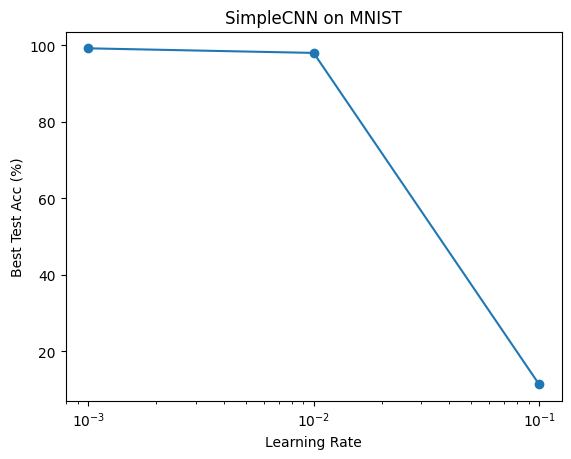

In [40]:
# Define the parameter grid
lrs = [1e-3, 1e-2, 1e-1]
accs = []

# Loop over parameters
for lr in lrs:
    _, acc = train(   
        batch_size=64, epochs=10, loader_fn=get_mnist_loaders,
        model_cls=SimpleCNN,model_kwargs={},
        optimizer_fn=torch.optim.Adam, optim_kwargs={"lr":lr}, 
        scheduler_fn=None, scheduler_kwargs=None, 
        criterion_fn=nn.CrossEntropyLoss, criterion_kwargs=None
    )
    accs.append(acc)

# Plot the graph
plt.semilogx(lrs, accs, marker="o")
plt.xlabel("Learning Rate"); plt.ylabel("Best Test Acc (%)")
plt.title("SimpleCNN on MNIST"); plt.show()


Epoch 1 [100/938] Loss: 1.2138
Epoch 1 [200/938] Loss: 0.8084
Epoch 1 [300/938] Loss: 0.7821
Epoch 1 [400/938] Loss: 0.6727
Epoch 1 [500/938] Loss: 0.5701
Epoch 1 [600/938] Loss: 0.4976
Epoch 1 [700/938] Loss: 0.4422
Epoch 1 [800/938] Loss: 0.4011
Epoch 1 [900/938] Loss: 0.3683
Epoch 1 [938/938] Loss: 0.3573
Epoch 1 complete. Test accuracy: 97.61%

 New best model saved to models/tmp_resnet_lr0.1_mom0.8_wd0.0005\best_model.pth

Epoch 2 [100/938] Loss: 0.0815
Epoch 2 [200/938] Loss: 0.0882
Epoch 2 [300/938] Loss: 0.0858
Epoch 2 [400/938] Loss: 0.0843
Epoch 2 [500/938] Loss: 0.0871
Epoch 2 [600/938] Loss: 0.0831
Epoch 2 [700/938] Loss: 0.0801
Epoch 2 [800/938] Loss: 0.0775
Epoch 2 [900/938] Loss: 0.0772
Epoch 2 [938/938] Loss: 0.0766
Epoch 2 complete. Test accuracy: 98.39%

 New best model saved to models/tmp_resnet_lr0.1_mom0.8_wd0.0005\best_model.pth

Epoch 3 [100/938] Loss: 0.0503
Epoch 3 [200/938] Loss: 0.0508
Epoch 3 [300/938] Loss: 0.0503
Epoch 3 [400/938] Loss: 0.0519
Epoch 3 [500

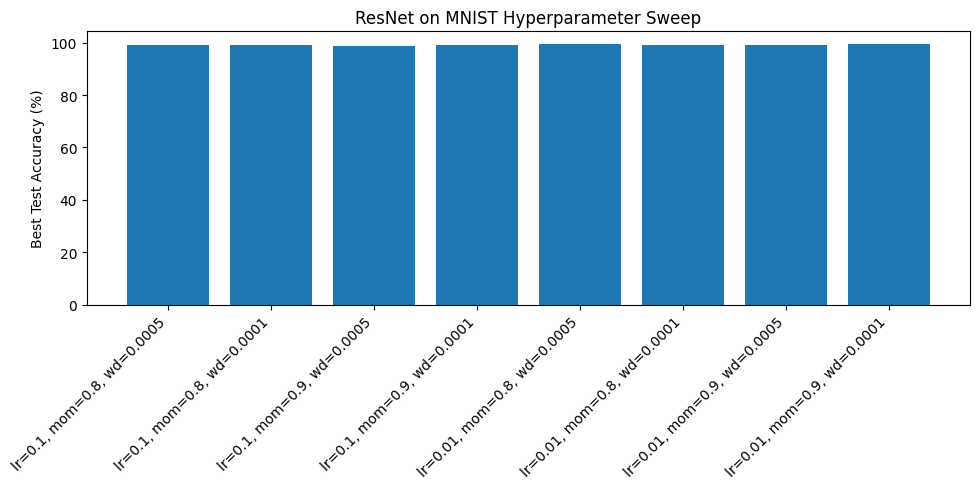

In [10]:
# Define the parameter grid
lrs  = [0.1, 0.01]
moms = [0.8, 0.9]
wds  = [5e-4, 1e-4]

# Loop over parameters
results = {}
for lr in lrs:
    for mom in moms:
        for wd in wds:
            _, acc = train(
                batch_size=64, epochs=10, data_dir="data",
                model_dir=f"models/tmp_resnet_lr{lr}_mom{mom}_wd{wd}",
                loader_fn=get_mnist_loaders, model_cls=ResNetClassifier, 
                model_kwargs={"in_channels":1, "num_classes":10},optimizer_fn=optim.SGD, 
                optim_kwargs={"lr": lr, "momentum": mom, "weight_decay": wd},
                scheduler_fn=optim.lr_scheduler.StepLR,
                scheduler_kwargs={"step_size":30, "gamma":0.1},
                criterion_fn=nn.CrossEntropyLoss, criterion_kwargs=None,)
            results[(lr, mom, wd)] = acc

# Plot the graph
labels = [f"lr={lr}, mom={mom}, wd={wd}" for (lr, mom, wd) in results]
accs   = [results[k] for k in results]

plt.figure(figsize=(10,5))
plt.bar(labels, accs)
plt.ylabel("Best Test Accuracy (%)")
plt.title("ResNet on MNIST Hyperparameter Sweep")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Epoch 1 [100/782] Loss: 2.2591
Epoch 1 [200/782] Loss: 2.1671
Epoch 1 [300/782] Loss: 2.1089
Epoch 1 [400/782] Loss: 2.0631
Epoch 1 [500/782] Loss: 2.0242
Epoch 1 [600/782] Loss: 1.9914
Epoch 1 [700/782] Loss: 1.9613
Epoch 1 [782/782] Loss: 1.9343
Epoch 1 complete. Test accuracy: 37.68%

 New best model saved to ../models\best_model.pth

Epoch 2 [100/782] Loss: 1.7026
Epoch 2 [200/782] Loss: 1.6928
Epoch 2 [300/782] Loss: 1.6856
Epoch 2 [400/782] Loss: 1.6755
Epoch 2 [500/782] Loss: 1.6668
Epoch 2 [600/782] Loss: 1.6613
Epoch 2 [700/782] Loss: 1.6527
Epoch 2 [782/782] Loss: 1.6464
Epoch 2 complete. Test accuracy: 42.93%

 New best model saved to ../models\best_model.pth

Epoch 3 [100/782] Loss: 1.5845
Epoch 3 [200/782] Loss: 1.5766
Epoch 3 [300/782] Loss: 1.5740
Epoch 3 [400/782] Loss: 1.5659
Epoch 3 [500/782] Loss: 1.5631
Epoch 3 [600/782] Loss: 1.5589
Epoch 3 [700/782] Loss: 1.5557
Epoch 3 [782/782] Loss: 1.5536
Epoch 3 complete. Test accuracy: 44.47%

 New best model saved to ../mod

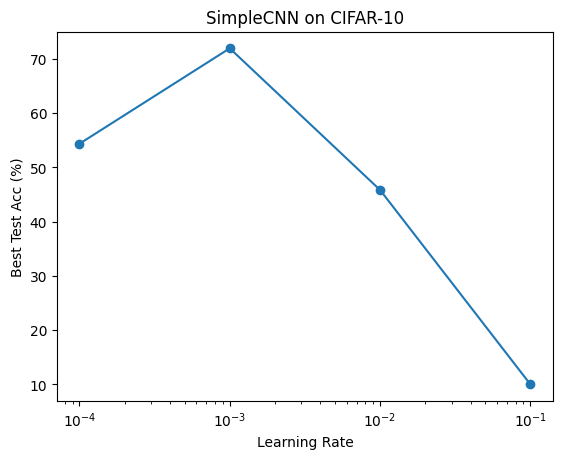

In [12]:
# Define the parameter grid
lrs = [1e-4,1e-3, 1e-2, 1e-1]
accs = []

# Loop over parameters
for lr in lrs:
    _, acc = train(   
        batch_size=64, epochs=10, loader_fn=get_cifar10_loaders,
        model_cls=SimpleCNN,model_kwargs={"in_channels": 3, "img_size": 32},
        optimizer_fn=torch.optim.Adam, optim_kwargs={"lr":lr}, 
        scheduler_fn=None, scheduler_kwargs=None, 
        criterion_fn=nn.CrossEntropyLoss, criterion_kwargs=None)
    accs.append(acc)

# Plot the graph
plt.semilogx(lrs, accs, marker="o")
plt.xlabel("Learning Rate"); plt.ylabel("Best Test Acc (%)")
plt.title("SimpleCNN on CIFAR-10"); plt.show()


100.0%


Epoch 1 [100/782] Loss: 2.9144
Epoch 1 [200/782] Loss: 2.4788
Epoch 1 [300/782] Loss: 2.2572
Epoch 1 [400/782] Loss: 2.1246
Epoch 1 [500/782] Loss: 2.0304
Epoch 1 [600/782] Loss: 1.9604
Epoch 1 [700/782] Loss: 1.9061
Epoch 1 [782/782] Loss: 1.8673
Epoch 1 complete. Test accuracy: 38.73%

 New best model saved to models/tmp_resnet_lr0.1_mom0.8_wd0.0005\best_model.pth

Epoch 2 [100/782] Loss: 1.5175
Epoch 2 [200/782] Loss: 1.4818
Epoch 2 [300/782] Loss: 1.4651
Epoch 2 [400/782] Loss: 1.4489
Epoch 2 [500/782] Loss: 1.4297
Epoch 2 [600/782] Loss: 1.4134
Epoch 2 [700/782] Loss: 1.3941
Epoch 2 [782/782] Loss: 1.3809
Epoch 2 complete. Test accuracy: 47.83%

 New best model saved to models/tmp_resnet_lr0.1_mom0.8_wd0.0005\best_model.pth

Epoch 3 [100/782] Loss: 1.2517
Epoch 3 [200/782] Loss: 1.2444
Epoch 3 [300/782] Loss: 1.2349
Epoch 3 [400/782] Loss: 1.2205
Epoch 3 [500/782] Loss: 1.2114
Epoch 3 [600/782] Loss: 1.1986
Epoch 3 [700/782] Loss: 1.1902
Epoch 3 [782/782] Loss: 1.1827
Epoch 3 comp

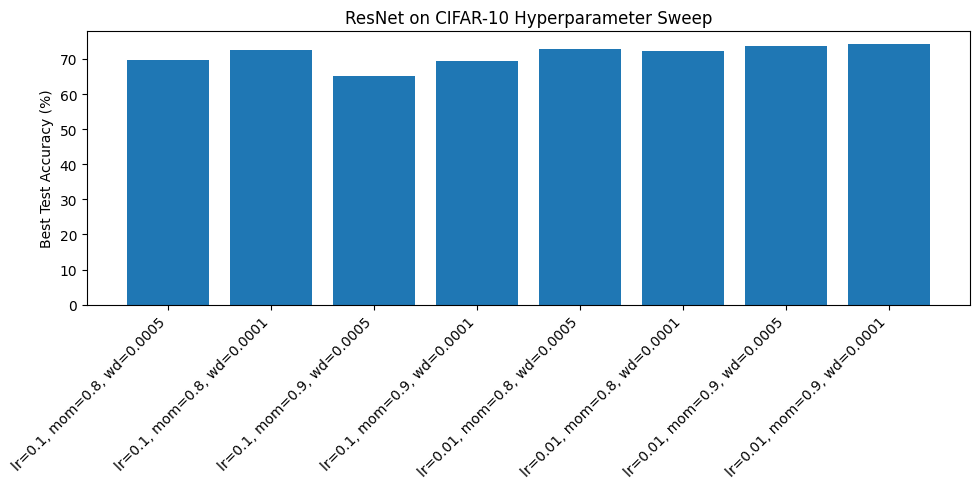

In [39]:
# Define the parameter grid
lrs  = [0.1, 0.01]
moms = [0.8, 0.9]
wds  = [5e-4, 1e-4]

# Loop over parameters
results = {}
for lr in lrs:
    for mom in moms:
        for wd in wds:
            _, acc = train(
                batch_size=64, epochs=10, data_dir="data",
                model_dir=f"models/tmp_resnet_lr{lr}_mom{mom}_wd{wd}",
                loader_fn=get_cifar10_loaders, model_cls=ResNetClassifier, 
                model_kwargs={"in_channels":3, "num_classes":10},optimizer_fn=optim.SGD, 
                optim_kwargs={"lr": lr, "momentum": mom, "weight_decay": wd},
                scheduler_fn=optim.lr_scheduler.StepLR,
                scheduler_kwargs={"step_size":30, "gamma":0.1},
                criterion_fn=nn.CrossEntropyLoss, criterion_kwargs=None,)
            results[(lr, mom, wd)] = acc

# Plot the graph
labels = [f"lr={lr}, mom={mom}, wd={wd}" for (lr, mom, wd) in results]
accs   = [results[k] for k in results]

plt.figure(figsize=(10,5))
plt.bar(labels, accs)
plt.ylabel("Best Test Accuracy (%)")
plt.title("ResNet on CIFAR-10 Hyperparameter Sweep")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Epoch 1 [100/391] Loss: 1.9555
Epoch 1 [200/391] Loss: 1.7981
Epoch 1 [300/391] Loss: 1.7034
Epoch 1 [391/391] Loss: 1.6417
Epoch 1 complete. Test accuracy: 48.85%

 New best model saved to models/tmp_resnet_lr0.01_step30\best_model.pth

Epoch 2 [100/391] Loss: 1.3741
Epoch 2 [200/391] Loss: 1.3385
Epoch 2 [300/391] Loss: 1.3187
Epoch 2 [391/391] Loss: 1.3016
Epoch 2 complete. Test accuracy: 57.70%

 New best model saved to models/tmp_resnet_lr0.01_step30\best_model.pth

Epoch 3 [100/391] Loss: 1.1722
Epoch 3 [200/391] Loss: 1.1627
Epoch 3 [300/391] Loss: 1.1431
Epoch 3 [391/391] Loss: 1.1265
Epoch 3 complete. Test accuracy: 60.23%

 New best model saved to models/tmp_resnet_lr0.01_step30\best_model.pth

Epoch 4 [100/391] Loss: 1.0709
Epoch 4 [200/391] Loss: 1.0539
Epoch 4 [300/391] Loss: 1.0420
Epoch 4 [391/391] Loss: 1.0271
Epoch 4 complete. Test accuracy: 60.22%


Epoch 5 [100/391] Loss: 0.9456
Epoch 5 [200/391] Loss: 0.9492
Epoch 5 [300/391] Loss: 0.9450
Epoch 5 [391/391] Loss: 0.9

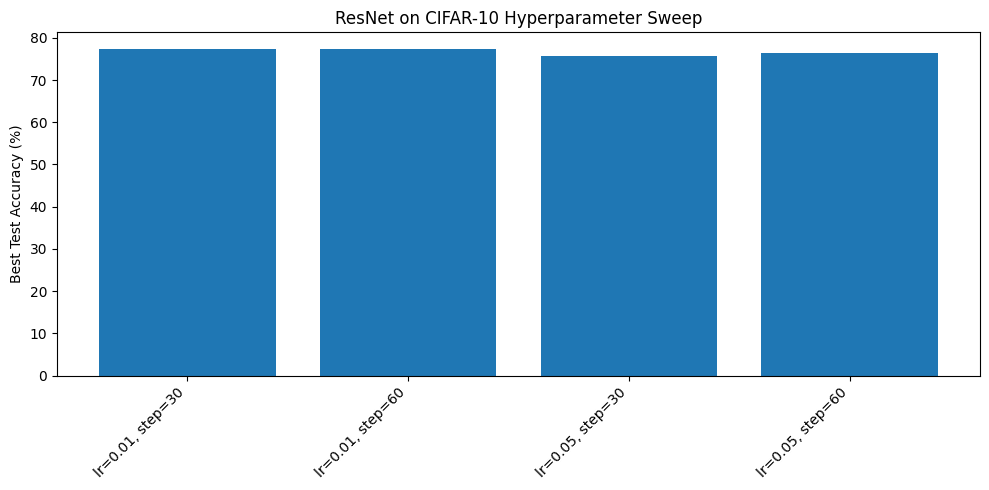

In [19]:
# Define the parameter grid
lrs  = [0.01, 0.05]
step_sizes  = [30, 60]

# Loop over parameters
results = {}
for lr in lrs:
    for step in step_sizes:
         _, acc = train(
            batch_size=128, epochs=20, data_dir="data",
            model_dir=f"models/tmp_resnet_lr{lr}_step{step}",
            loader_fn=get_cifar10_loaders, model_cls=ResNetClassifier, 
            model_kwargs={"in_channels":3, "num_classes":10},optimizer_fn=optim.SGD, 
            optim_kwargs={"lr": lr, "momentum": 0.9, "weight_decay": 5e-4},
            scheduler_fn=optim.lr_scheduler.StepLR,
            scheduler_kwargs={"step_size":step, "gamma":0.1},
            criterion_fn=nn.CrossEntropyLoss, criterion_kwargs=None,)
         results[(lr, step)] = acc

# Plot the graph
labels = [f"lr={lr}, step={step}" for (lr, step) in results]
accs   = [results[k] for k in results]

plt.figure(figsize=(10,5))
plt.bar(labels, accs)
plt.ylabel("Best Test Accuracy (%)")
plt.title("ResNet on CIFAR-10 Hyperparameter Sweep")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
